# Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Import the dataset

In [19]:
data = pd.read_csv('IBM_data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Splitting the data in X and Y

In [20]:
x = data.drop('Attrition',axis=1)
y = data[['Attrition']]

# As the columns in our feature set (x) contains string values which ML model do not understand so we need to convert them into numerical values. For that we will do the Encoding. Here i am using Label Encoding.

#### Separating all the categorical columns

In [21]:
cat_col = x.columns[x.dtypes==object]
data[cat_col].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


#### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_col:
    x[col] = enc.fit_transform(x[col])

In [23]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


# Before applying PCA it is recommended to do the feature scaling and for that i will be using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data,columns=[x.columns])

In [26]:
scaled_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


# PCA

In [27]:
pca = PCA()
df_pca = pca.fit_transform(X=scaled_data)

# Plotting in order to know how much Principle components are required in order to get maximum information

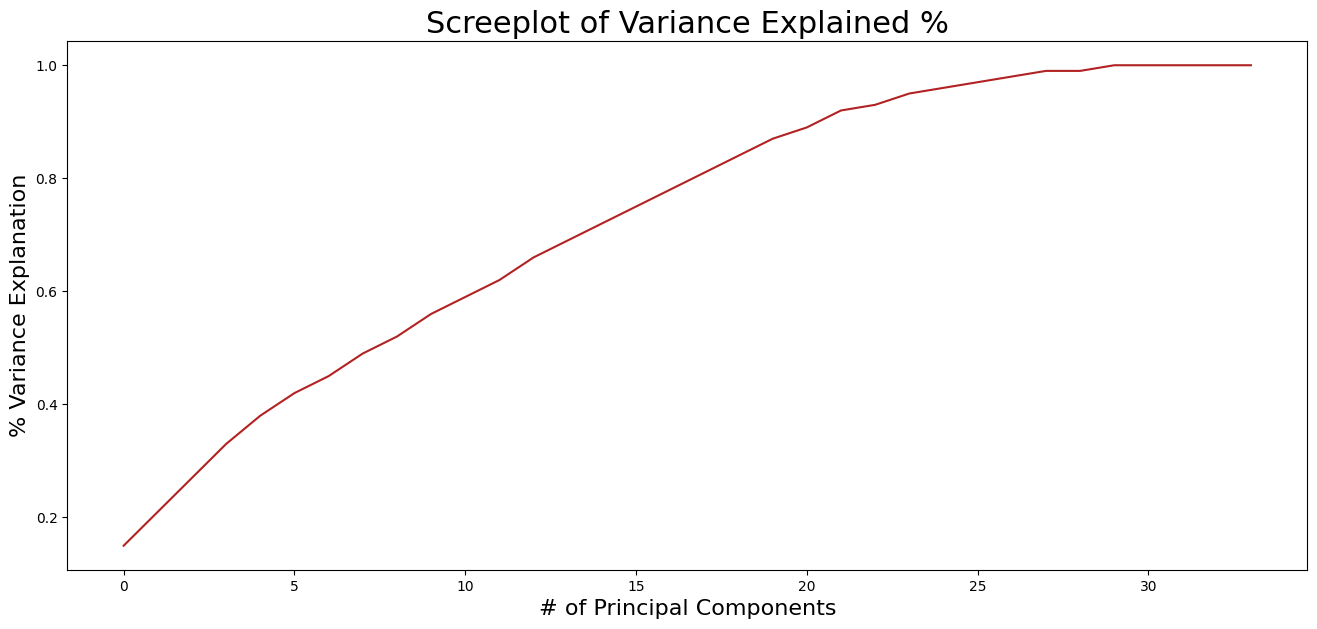

In [32]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of Principal Components', fontsize=16)
plt.ylabel('% Variance Explanation', fontsize=16)
plt.show()

### Above graph shows that we can take any number between 20 - 25 as principle components and we can create our features and use them to train our model. I am taking as 23

In [33]:
pca = PCA(n_components=23)
x_pca = pca.fit_transform(scaled_data)

In [35]:
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.392964,0.236304,-1.775739,1.984536,0.974460,1.314296,-2.665549,-0.077257,0.217668,-3.209070,...,0.605721,-1.939930,-0.687001,-0.530650,0.628932,1.352047,0.586915,0.810909,1.651030,-0.210440
1,0.578933,-1.302801,2.953643,0.759909,-0.003700,1.192379,0.729243,0.714360,-0.326259,1.059381,...,-0.394565,-0.825154,0.907917,-0.893655,-0.917171,0.415243,0.547831,-0.148088,0.235740,-1.984705
2,-2.464301,1.229835,-0.328673,1.069394,-1.285547,1.403253,0.092819,-2.318801,0.245875,-0.079179,...,1.783157,-0.453685,-1.218405,1.009195,-0.761397,0.920239,0.817273,-0.726590,1.518379,0.066115
3,-0.859846,-0.495665,-1.220481,-0.055405,-0.405273,2.111816,-0.685153,-0.359813,0.734064,-0.083535,...,-0.937793,-0.844736,-0.995431,0.457753,-0.169042,0.294989,-0.070446,-1.673394,-0.238331,0.177661
4,-1.835542,1.256571,-0.559648,-0.313244,-1.024512,0.610879,0.478300,-1.445889,-1.167444,0.764610,...,0.180999,0.059271,1.043300,-2.275977,0.510219,0.160342,-0.750841,0.659885,2.216127,0.815696


### Hence we can use the above feature set in order to train our model.